In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
Dataset = pd.read_csv("tested.csv")

In [ ]:
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Checking the Dataset

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
print("Total Missing value present in the Dataset :- ",Dataset.isnull().sum().values.sum())

Total Missing value present in the Dataset :-  414


In [ ]:
print(f"Number of rows :- {Dataset.shape[0]} and number of columns are :- {Dataset.shape[1]}")

Number of rows :- 418 and number of columns are :- 12


In [ ]:
print(f"The Feature names are :- {Dataset.columns.tolist()}")

The Feature names are :- ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
print("Unique value in the dataset :- \n",Dataset.nunique())

Unique value in the dataset :- 
 PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [ ]:
Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# let make dataset visualization

<ipython-input-142-185cd83696d6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset['Fare'],color='g')
<ipython-input-142-185cd83696d6>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset['Age'],color='g')


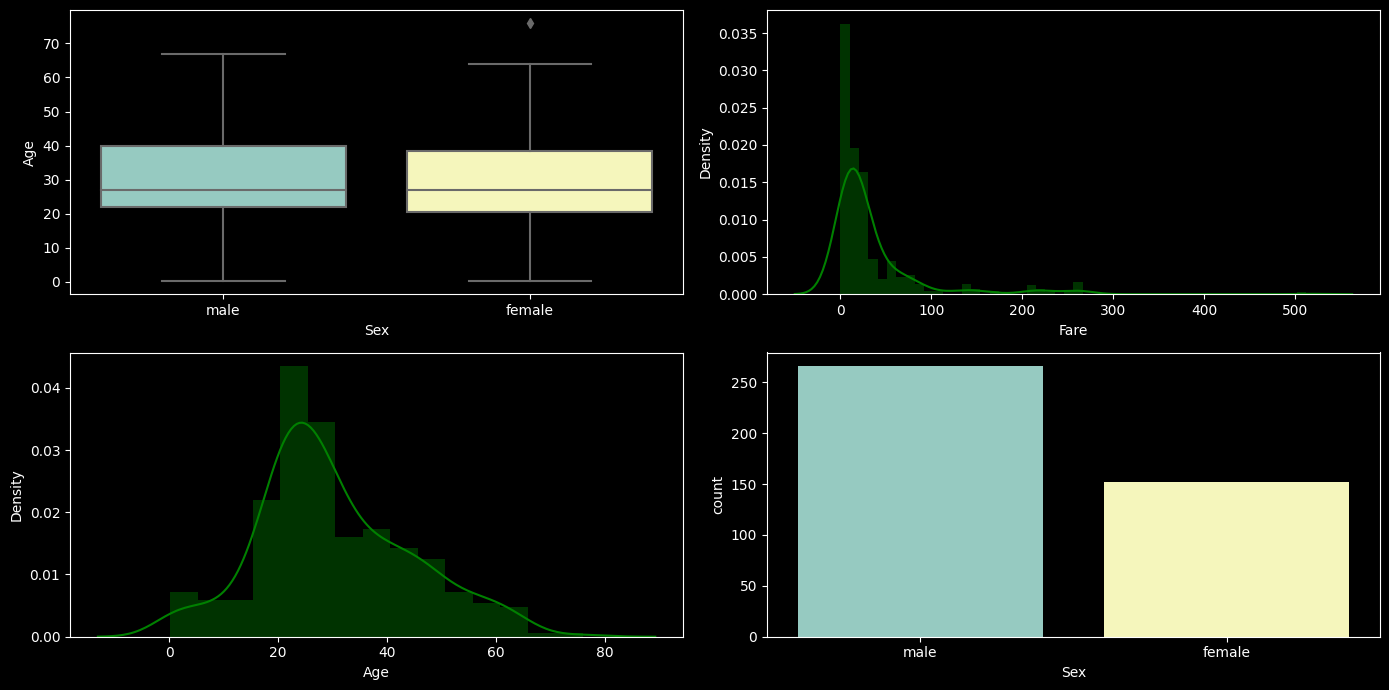

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= Dataset)

plt.subplot(2,2,2)
sns.distplot(Dataset['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(Dataset['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=Dataset)

plt.tight_layout()
plt.show()

<ipython-input-143-75f505748762>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = Dataset.corr()


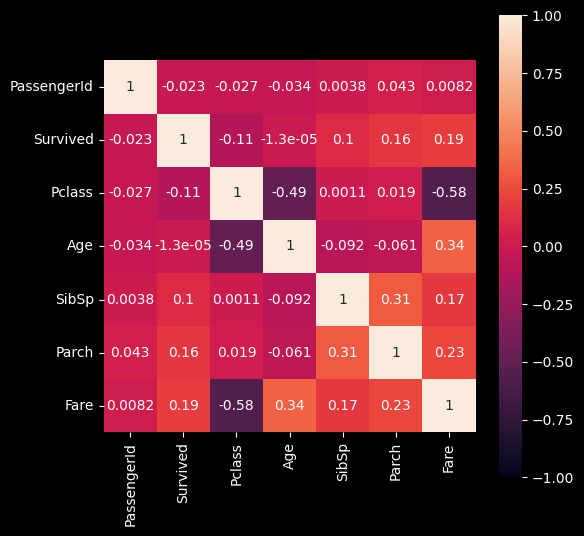

In [ ]:
corrmat = Dataset.corr()
fig = plt.figure(figsize = (6, 6))

sns.heatmap(corrmat, vmax = 1,vmin=-1, square = True, annot = True)
plt.show()

In [ ]:
# Feature engineering

In [ ]:
Dataset.drop(columns=['PassengerId','Name','Embarked','Cabin'],inplace = True)
Dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,34.5,0,0,330911,7.8292
1,1,3,female,47.0,1,0,363272,7.0000
2,0,2,male,62.0,0,0,240276,9.6875
3,0,3,male,27.0,0,0,315154,8.6625
4,1,3,female,22.0,1,1,3101298,12.2875


In [ ]:
Dataset.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

In [ ]:
Dataset['Age'] = Dataset['Age'].fillna(Dataset['Age'].median())

Dataset['Fare'] = Dataset['Fare'].fillna(Dataset['Fare'].median())

In [ ]:
Dataset.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

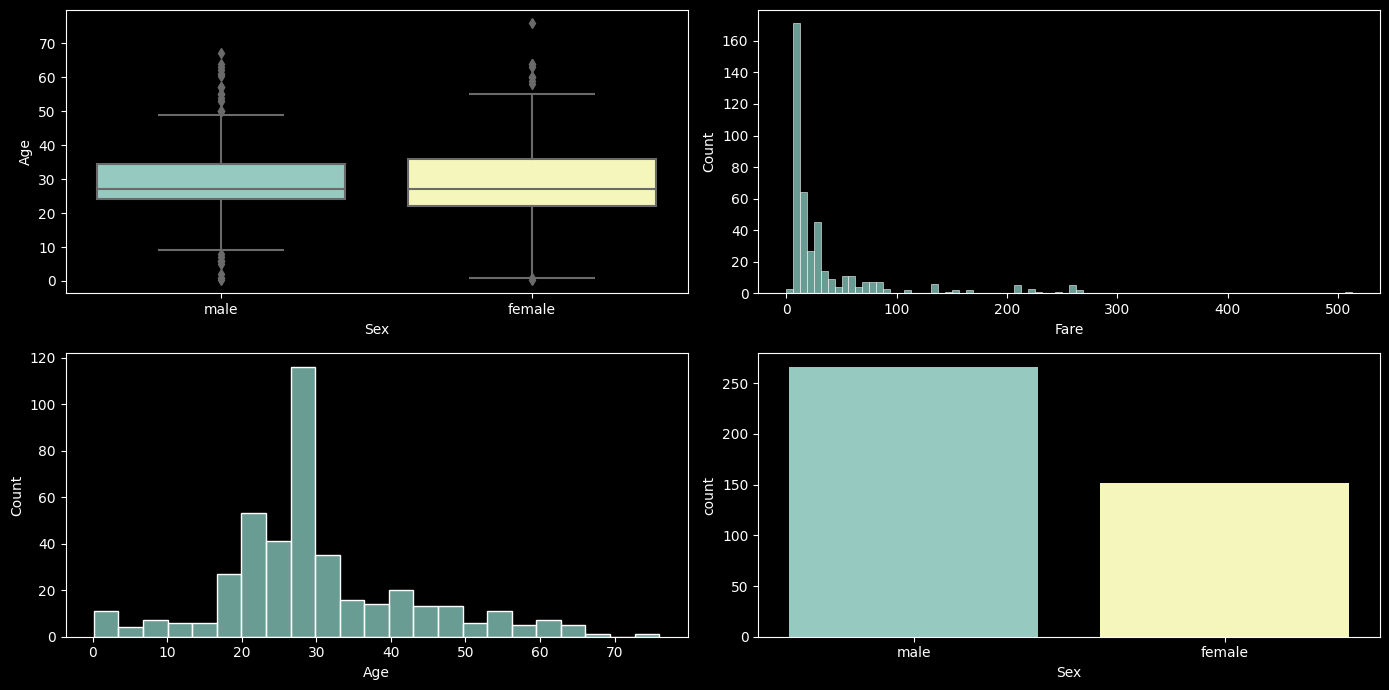

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= Dataset)

plt.subplot(2,2,2)
sns.histplot(Dataset['Fare'])

plt.subplot(2,2,3)
sns.histplot(Dataset['Age'])

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=Dataset)

plt.tight_layout()
plt.show()

In [ ]:
Dataset[Dataset['Age']>=60]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
2,0,2,male,62.0,0,0,240276,9.6875
13,0,2,male,63.0,1,0,24065,26.0000
48,1,1,female,60.0,0,0,11813,76.2917
69,1,1,female,60.0,1,4,19950,263.0000
81,0,1,male,67.0,1,0,PC 17483,221.7792
96,1,1,female,76.0,1,0,19877,78.8500
114,1,1,female,63.0,1,0,PC 17483,221.7792
142,0,1,male,61.0,1,3,PC 17608,262.3750
152,0,3,male,60.5,0,0,3701,14.4542
179,1,1,female,64.0,0,2,PC 17756,83.1583


In [ ]:
Dataset.Sex =Dataset.Sex.map({'male':1,'female':0})
Dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,34.5,0,0,330911,7.8292
1,1,3,0,47.0,1,0,363272,7.0000
2,0,2,1,62.0,0,0,240276,9.6875
3,0,3,1,27.0,0,0,315154,8.6625
4,1,3,0,22.0,1,1,3101298,12.2875
...,...,...,...,...,...,...,...,...
413,0,3,1,27.0,0,0,A.5. 3236,8.0500
414,1,1,0,39.0,0,0,PC 17758,108.9000
415,0,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500
416,0,3,1,27.0,0,0,359309,8.0500


In [ ]:
Dataset['Ticket'] = Dataset['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [ ]:
# Spliting the Datase in input and output variable

In [ ]:
x = Dataset.drop(['Survived'],axis=1)
y = Dataset['Survived']

In [ ]:
# Split the dataset in train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8 , random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# model buildinig

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(64,activation = 'relu',input_shape = (x_train_scaled.shape[1],)))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_scaled,y_train,epochs = 100 , batch_size = 16 ,validation_split=0.3)

Epoch 1/100
15/15 [==============================] - 1s 15ms/step - loss: 0.5146 - accuracy: 0.8670 - val_loss: 0.4464 - val_accuracy: 0.9802
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.9914 - val_loss: 0.3173 - val_accuracy: 1.0000
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2530 - accuracy: 0.9957 - val_loss: 0.2056 - val_accuracy: 1.0000
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1600 - accuracy: 0.9957 - val_loss: 0.1280 - val_accuracy: 1.0000
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9957 - val_loss: 0.0779 - val_accuracy: 1.0000
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9957 - val_loss: 0.0492 - val_accuracy: 1.0000
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 8/100


In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 99.98%


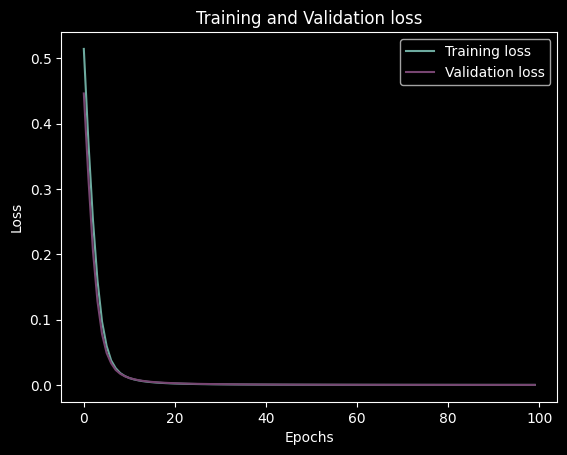

In [ ]:
  # Plotting training and validation loss over epochs

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

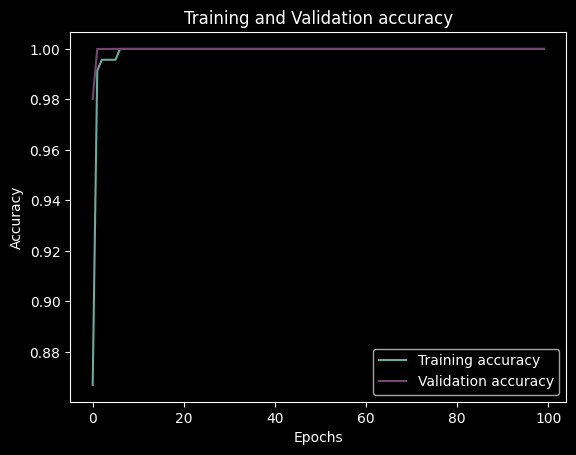

In [ ]:
# plotting training and validation accuracy
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()